## LOADS

In [1]:
import os
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:

archive = "my_ufold.csv"
groups= "ufold_RNA_Groups.csv"
lens = "ufold_lengths.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100


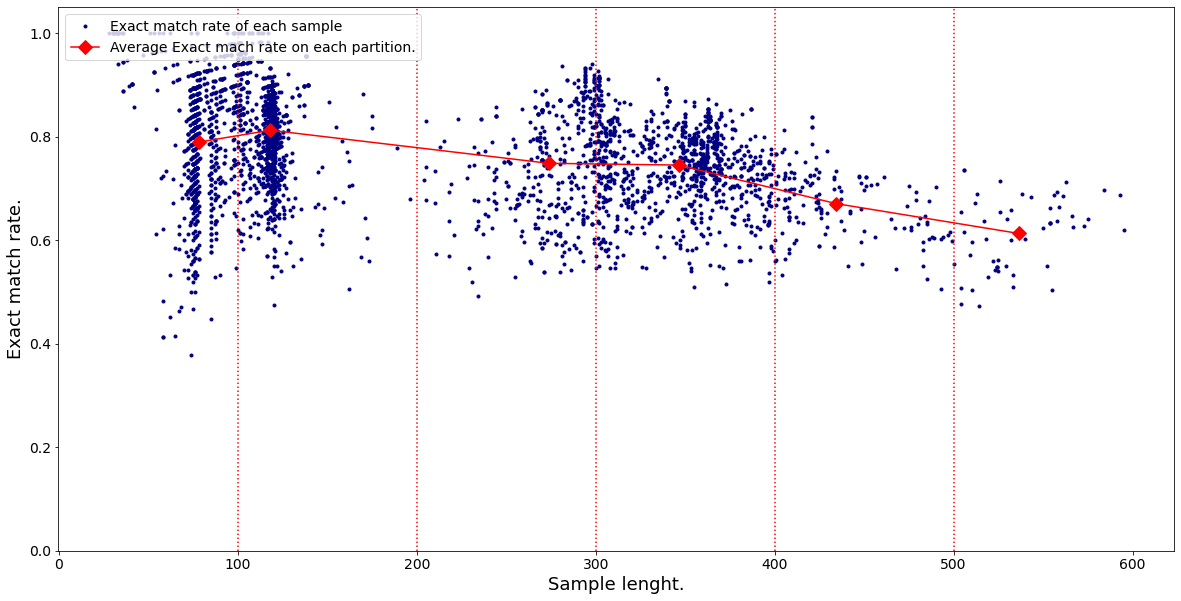

In [14]:
sorted_all_ex_acc          =   [x for _, x in sorted(zip(lens,        list_ex_acc))]

cont = 0
hundred  =0
hundred2 =0
hundred3 =0
hundred4 =0
hundred5 =0
for i in sorted(lens):
    if i >= 100 and hundred == 0:
        hundred = cont
    if i >= 200 and hundred2 == 0:
        hundred2 = cont
    if i >= 300 and hundred3 == 0:
        hundred3 = cont
    if i >= 400 and hundred4 == 0:
        hundred4 = cont
    if i >= 500 and hundred5 == 0:
        hundred5 = cont
    cont = cont + 1

average_list_ex = [ np.average(sorted_all_ex_acc[:hundred]),
                    np.average(sorted_all_ex_acc[hundred:hundred2]),
                    np.average(sorted_all_ex_acc[hundred2:hundred3]),
                    np.average(sorted_all_ex_acc[hundred3:hundred4]),
                    np.average(sorted_all_ex_acc[hundred4:hundred5]),
                    np.average(sorted_all_ex_acc[hundred5:])
                    ]
average_list_len = [np.average(list(sorted(lens))[:hundred]),
                    np.average(list(sorted(lens))[hundred:hundred2]),
                    np.average(list(sorted(lens))[hundred2:hundred3]),
                    np.average(list(sorted(lens))[hundred3:hundred4]),
                    np.average(list(sorted(lens))[hundred4:hundred5]),
                    np.average(list(sorted(lens))[hundred5:])
                    ]

f, ax = plt.subplots(figsize=(20, 10))

ax.plot(sorted(lens), sorted_all_ex_acc, label='Exact match rate of each sample', color="navy", marker=".", linestyle="")
ax.plot(average_list_len, average_list_ex, color="red", marker="D", linestyle="-", markersize=10, label = "Average Exact mach rate on each partition.")
ax.plot()
plt.axvline(x=100, linestyle=":", color="r")
plt.axvline(x=200, linestyle=":", color="r")
plt.axvline(x=300, linestyle=":", color="r")
plt.axvline(x=400, linestyle=":", color="r")
plt.axvline(x=500, linestyle=":", color="r")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.ylim(0, 1.05)
plt.xlabel("Sample lenght.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.legend(loc=2, prop={'size': 14})
plt.show()
